# Обучение с учителем в Scikit-learn

На предыдущих уроках мы изучили инструменты, которые позволяют работать с данными: загружать, просматривать, фильтровать, преобразовывать, визуализировать. Всё это делалось с помощью библиотек `numpy`, `pandas` и `matplotlib`. Такая работа позволяет получить представление об информации, содержащейся в данных, и сделать какие-то выводы.

Когда данных имеется достаточное количество, можно доверить получение выводов по этим данным в руки специальным алгоритмам, умеющим в зависимости от поставленной задачи прогнозировать интересующую нас величину, классифицировать объекты или разбивать их на группы.

Совокупность таких алгоритмов образует дисциплину под названием _Машинное обучение_. Эту дисциплину можно разделить на две основные части: обучение с учителем и обучение без учителя. 

На этом уроке мы рассмотрим обучение с учителем. Основная особенность этого вида обучения состоит в том, что помимо набора данных, по которым мы хотим предсказать ту или иную величину, у нас имеется для этих данных набор правильных ответов. Наша задача в этом случае - построить модель, которая будет способна наиболее точно _обобщать_ эти данные, то есть предсказывать этот правильный ответ по данным, в которых этого правильного ответа у нас нет.

---
## Линейная регрессия

<ol>
    <li>Работа со встроенными наборами</li>
    <li>Разбивание данных на тренировачный и тестовый датасеты</li>
    <li>Построение модели линейной регрессии</li>
    <li>Метрики оценки качества регрессионных моделей</li>
    <li>Просмотр коэффициентов линейной регрессии</li>
    <li>Стандартизация признаков</li>
    <li>Модели линейной регрессии с регуляризацией</li>
</ol>
    
Время: 00:35


In [1]:
import numpy as np
import pandas as pd

**Работа со встроенными данными**

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston.data

In [7]:
type(data)

numpy.ndarray

In [8]:
data.shape

(506, 13)

In [9]:
data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [10]:
target = boston.target

In [11]:
type(target)

numpy.ndarray

In [12]:
target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [14]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Описание датасета:

In [16]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [17]:
for line in boston.DESCR.split('\n'):
    print(line)
    

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Создаем датафреймы признаков и целевой переменной:

In [18]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
X.shape

(506, 13)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [21]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [22]:
y.shape

(506, 1)

In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Пропущенных значений нет!

**Разбиение данных на тренировачные и тестовые**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [28]:
X_train.head(), X_test.head()

(        CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
 182  0.09103   0.0   2.46   0.0  0.4880  7.155  92.2  2.7006  3.0  193.0   
 155  3.53501   0.0  19.58   1.0  0.8710  6.152  82.6  1.7455  5.0  403.0   
 280  0.03578  20.0   3.33   0.0  0.4429  7.820  64.5  4.6947  5.0  216.0   
 126  0.38735   0.0  25.65   0.0  0.5810  5.613  95.6  1.7572  2.0  188.0   
 329  0.06724   0.0   3.24   0.0  0.4600  6.333  17.2  5.2146  4.0  430.0   
 
      PTRATIO       B  LSTAT  
 182     17.8  394.12   4.82  
 155     14.7   88.01  15.02  
 280     14.9  387.31   3.76  
 126     19.1  359.29  27.26  
 329     16.9  375.21   7.34  ,
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
 173  0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   
 274  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
 491  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
 72   0.09164   0.0  10.81   0.0  0.413  

**Построение модели линейной регрессии**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641
76,20.0,23.213983
316,17.8,17.593112
140,14.0,14.305081
471,19.6,23.054390
500,16.8,20.620083


**Метрики оценки качества для задач регрессии**

Mean squared error (MSE)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

22.098694827098036

Mean absolute error (MAE)

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
initial_mae = mean_absolute_error(y_test, y_pred)
initial_mae

3.060939595437034

$R^{2}$

In [45]:
from sklearn.metrics import r2_score

In [48]:
r2 = r2_score(y_test, y_pred)
r2

0.6844267283527123

**Коэфициенты линейной регрессии**

In [50]:
# w0
lr.intercept_

array([29.83642016])

In [52]:
# w1...wm
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [54]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

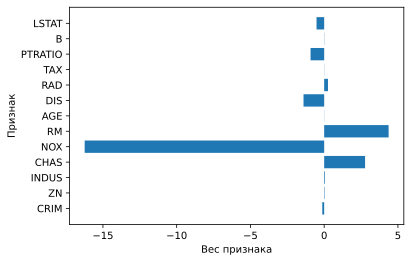

In [55]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Непонятно какие признаки жесткие, а какие нет. Нужно масштабирование признаков! Что можно сделать?

**Стандартизация признаков**

$$x_{scaled} = \dfrac{x - x_{mean}}{\sigma_x}$$

После стандартизации каждый признак имеет среднее значение 0 и среднее квадратическое отклонение 1.

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

_fit_ - вычисляем для каждого признака Среднее значение и СКО.

_transform_ - используя вычисленные Среднее значение и СКО, преобразуем данные по формуле.

Если делаем просто transform, то будут применятся уже вычисленные до этого Среднеее значение и СКО. Поэтому для тестовой выборки признаков мы используем значения, которые были получены благодаря тренировочной выборке.

In [58]:
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406795,-0.502812,-1.247076,-0.287849,-0.591174,1.156255,0.833235,-0.503753,-0.740571,-1.280208,-0.205157,0.404512,-1.077756
1,0.007992,-0.502812,1.218283,3.474042,2.628380,-0.238475,0.486246,-0.956440,-0.507741,-0.013937,-1.576252,-3.098037,0.351165
2,-0.413450,0.364381,-1.121792,-0.287849,-0.970291,2.080976,-0.167973,0.441388,-0.507741,-1.141522,-1.487795,0.326591,-1.226252
3,-0.371107,-0.502812,2.092391,-0.287849,0.190598,-0.987986,0.956127,-0.950895,-0.856986,-1.310358,0.369819,0.005983,2.065870
4,-0.409661,-0.502812,-1.134753,-0.287849,-0.826546,0.013216,-1.877617,0.687804,-0.624156,0.148869,-0.603217,0.188141,-0.724729


In [60]:
X_test_scaled = scaler.transform(X_test)

In [61]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406705,-0.502812,-1.018109,-0.287849,-0.406239,0.128632,0.540463,-0.529489,-0.507741,-0.659132,-0.735903,0.420302,-0.486575
1,-0.410961,1.231575,-0.678258,3.474042,-0.935826,0.604203,-1.310145,0.148902,-0.624156,-0.912387,-0.293614,0.436321,-1.258473
2,-0.405024,-0.502812,2.393361,-0.287849,0.425970,-0.473480,1.071790,-0.898332,-0.624156,1.843261,0.812108,0.358629,0.778440
3,-0.406722,-0.502812,-0.044638,-0.287849,-1.221635,-0.359454,-2.217377,0.722262,-0.624156,-0.604864,0.414048,0.367783,-0.979693
4,0.195293,-0.502812,1.005156,-0.287849,1.300209,-0.036844,0.818777,-0.661300,1.704142,1.571917,0.856337,0.301190,0.666368


Чтобы теперь посмотреть вклад каждого признака, снова обучим модель

In [62]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

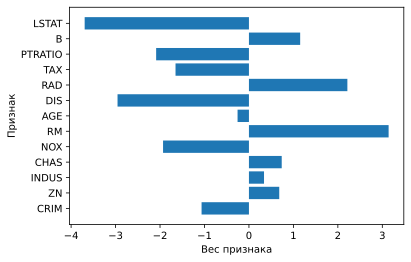

In [63]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Убираем признаки, близкие к 0

In [64]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [75]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [76]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    model.fit(X_train.loc[:, feats] ,y_train)
    y_pred = model.predict(X_test.loc[:,feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [77]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

21.79024941647527

In [78]:
# Сверяем с исходной ошибкой

In [79]:
initial_mse

22.098694827098036

Вывод: отбрасывание маловажных признаков близких к 0 мы получили более точную модель.

**Модели линейной регрессии с регуляризацией**

LinearRegression() - без регуляризации<br>
Lasso() - с регуляризацией $L_1$<br>
Ridge() - с регуляризацией $L_2$<br>
[Описание](https://craftappmobile.com/l1-%D0%B8-l2-%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F-%D0%B4%D0%BB%D1%8F-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80/)

In [80]:
from sklearn.linear_model import Lasso, Ridge

Lasso

In [81]:
model = Lasso(alpha=0.003)

In [82]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.811408732029218

Ridge

In [83]:
model = Ridge(alpha=0.003)

In [84]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)

21.79033622379152

In [127]:
ridge_list = np.logspace(-4, -2, 20)
ridge_list

array([0.0001    , 0.00012743, 0.00016238, 0.00020691, 0.00026367,
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.00088587,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ])

In [128]:
ridge_mse = []
for a in ridge_list:
    model = Ridge(alpha=a)
    ridge_mse.append(create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, model)-21)

In [129]:
ridge_mse

[0.7902523100992411,
 0.7902531037473501,
 0.7902541150729263,
 0.7902554037792484,
 0.7902570459445535,
 0.7902591385132176,
 0.790261805018666,
 0.7902652028759043,
 0.7902695326739355,
 0.7902750500168132,
 0.7902820806118207,
 0.7902910394956102,
 0.7903024555323128,
 0.7903170026295605,
 0.7903355395135705,
 0.7903591604092703,
 0.7903892596141517,
 0.7904276137717758,
 0.7904764866930982,
 0.7905387628981515]

Text(0, 0.5, 'error')

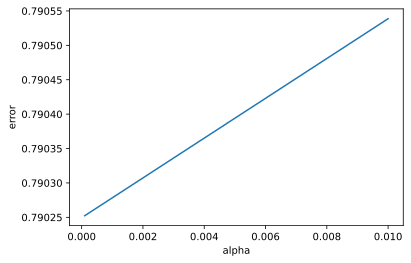

In [130]:
plt.plot(ridge_list, ridge_mse)
# plt.yscale(value='log')
plt.xlabel('alpha')
plt.ylabel('error')

Вывод: При использовании L2 уменьшение весов происходит более плавно, чем при L1. <u>L2-регуляризация предотвращает переобучения модели путём запрета на непропорционально большие весовые коэффициенты</u>. А <u>L1-регуляризация реализует это путём отбора наиболее важных факторов</u>, которые сильнее всего влияют на результат. Для простоты можете считать, что факторы с малой величиной влияния на конечный результат фактически «помогают» вам предсказывать лишь шум в наборе обучающих данных.

---
## Логистическая регрессия

<ol>
    <li>Применение логистической регрессии</li>
    <li>Качество данных и их очистка</li>
    <li>Работа с категориальными признаками</li>
    <li>Цель разбиения на тренировачный, валидационный и тестовый датасеты</li>
    <li>Вычисление вероятности событий</li>
</ol>
    
Время: 12:30 

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**Логистическая регрессия**

Используется для задач классификации, а на выходе возвращает вероятность события того или иного класса!

**Log loss**

Алгоритм логистической регрессии минимизирует величину $logloss$:

$$logloss(x) = - y \cdot \operatorname{ln} (p) - (1 - y) \cdot \operatorname{ln} (1 - p).$$

logloss для логистической регрессии это почти = mse для линейной регрессии 

**Пример**

In [132]:
data = pd.read_csv('titanic_train.csv')

In [133]:
type(data)

pandas.core.frame.DataFrame

In [134]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Есть пропуски, na значения!

In [136]:
data = data.set_index('PassengerId')

In [137]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [138]:
target = 'Survived'

In [139]:
y = data[target]

In [140]:
#axis=1 по столбцам
X = data.drop(target, axis=1)

**Изучение качества данных и их очистка**

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [142]:
X = X.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [143]:
mean_age = X['Age'].mean()
mean_age

29.69911764705882

In [144]:
X['Age'] = X['Age'].fillna(mean_age)

In [145]:
X['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [146]:
X['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

In [147]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [148]:
X['Embarked'].mode()

0    S
dtype: object

In [149]:
X['Embarked'] = X['Embarked'].fillna('S')

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


Null больше нет! 

**Работа с категориальными признаками**

In [151]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [152]:
X = pd.get_dummies(X)

In [153]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


In [154]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Переводим признак Pclass в тип category

In [155]:
X['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [156]:
X['Pclass'] = X['Pclass'].astype('category')

In [157]:
X = pd.get_dummies(X)

In [158]:
X.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [159]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

**Цель разбиения данных на тренировачный, валидачионный и тестовые датасеты**

In [160]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.25, random_state=42)

In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         668 non-null    float64
 1   SibSp       668 non-null    int64  
 2   Parch       668 non-null    int64  
 3   Fare        668 non-null    float64
 4   Sex_female  668 non-null    uint8  
 5   Sex_male    668 non-null    uint8  
 6   Embarked_C  668 non-null    uint8  
 7   Embarked_Q  668 non-null    uint8  
 8   Embarked_S  668 non-null    uint8  
 9   Pclass_1    668 non-null    uint8  
 10  Pclass_2    668 non-null    uint8  
 11  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 31.3 KB


Поскольку все признаки числовые - мы можем использовать все признаки для построения модели!

In [162]:
lr = LogisticRegression()

In [163]:
lr.fit(X_train, y_train)

C:\Users\pakhomov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
y_pred = lr.predict(X_valid)

In [165]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

Метрика Accuaracy (точность, доля правильных ответов)

In [166]:
from sklearn.metrics import accuracy_score

In [167]:
accuracy_score(y_valid, y_pred)

0.8026905829596412

**Смотрим вероятности события**

In [168]:
y_proba = lr.predict_log_proba(X_valid)

In [171]:
y_proba[:5, :]

array([[-0.1147065 , -2.22218365],
       [-0.30382631, -1.33936893],
       [-0.1347609 , -2.07087704],
       [-2.41380418, -0.09373312],
       [-1.39835156, -0.2836951 ]])

**Сохраним данные для урока 5**

In [173]:
X_train.to_pickle('X_train.pkl')
y_train.to_pickle('y_train.pkl')

X_valid.to_pickle('X_valid.pkl')
y_valid.to_pickle('y_valid.pkl')

---
## Support Vector Machine

<ol>
    <li>Применение метода опорных векторов</li>
    <li>Нормализация признаков</li>
    <li>Классификация с помощью Support Vector Classifier</li>
    <li>Тюнинг модели SVC</li>
</ol>
    
Время: 23:30 

In [174]:
import pandas as pd
import numpy as np

Метод SVM один из самых известных методов машинного обучения! Строит гиперплоскость между объектами и тем самым создает классы. Зазор должен быть максимальным, а ошибка минимальной. Импортируем классификатор:

In [180]:
from sklearn.svm import SVC

In [181]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

**Нормализация признаков**

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scaler = MinMaxScaler()

In [184]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
299,29.699118,0,0,30.5000,0,1,0,0,1,1,0,0
885,25.000000,0,0,7.0500,0,1,0,0,1,0,0,1
248,24.000000,0,2,14.5000,1,0,0,0,1,0,1,0
479,22.000000,0,0,7.5208,0,1,0,0,1,0,0,1
306,0.920000,1,2,151.5500,0,1,0,0,1,1,0,0


При нормализации все значения признаков находятся в диапазоне [0,1]

In [185]:
X_train.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,29.476233,0.553892,0.372754,32.179397,0.342814,0.657186,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,13.009962,1.185279,0.795588,51.604012,0.475006,0.475006,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.400000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,30.500000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Так как большинство признаков уже dummies, то применим нормализацию лишь у нескольких:

In [186]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [187]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [188]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
299,0.367921,0.000,0.000000,0.059532,0,1,0,0,1,1,0,0
885,0.308872,0.000,0.000000,0.013761,0,1,0,0,1,0,0,1
248,0.296306,0.000,0.333333,0.028302,1,0,0,0,1,0,1,0
479,0.271174,0.000,0.000000,0.014680,0,1,0,0,1,0,0,1
306,0.006283,0.125,0.333333,0.295806,0,1,0,0,1,1,0,0


In [191]:
X_train.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.365120,0.069237,0.062126,0.062810,0.342814,0.657186,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.163483,0.148160,0.132598,0.100724,0.475006,0.475006,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028107,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.059532,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Применяем расчитанные коэфициенты к валидационным данным:

In [189]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [190]:
X_valid.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.376310,0.053812,0.068012,0.063003,0.381166,0.618834,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.163162,0.100208,0.139652,0.085059,0.486766,0.486766,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.005152,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283740,0.000000,0.000000,0.015412,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.029758,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.447097,0.125000,0.166667,0.061155,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,0.886906,0.500000,0.833333,0.512122,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


В итоге данные нормализованы согласовано, значения в пределах 0 и 1 в min и max :)

**Сохранение и загрузка модели нормализации**

In [193]:
import joblib

In [194]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [195]:
scaler = joblib.load('min_max_scaler.pkl')

**Support Vector Classificator (SVC)**

In [196]:
clf = SVC()

In [197]:
clf.fit(X_train, y_train)

SVC()

In [201]:
y_pred = clf.predict(X_valid)

Предсказание тренировачных данных, дабы отследить переобучение

In [204]:
y_pred_train = clf.predict(X_train)

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
accuracy_score(y_valid, y_pred)

0.8071748878923767

In [207]:
accuracy_score(y_train, y_pred_train)

0.812874251497006

**Тюнинг модели SVC**

Параметр С - штрафует за ошибку классификации. Варьируя С, можно добиваться более лучших показателей :)

In [208]:
c_vals = np.logspace(-2,5,29)

In [209]:
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [210]:
accuracy_on_valid = []
accuracy_on_train = []

for val in c_vals:
    clf = SVC(C=val, gamma="auto")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)
    
    print('C={} \tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

C=0.01 	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C=0.01778279410038923 	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402

C=0.03162277660168379 	acc_valid = 0.726457399103139 
	acc_train = 0.7215568862275449

C=0.05623413251903491 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=0.1 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=0.1778279410038923 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=0.31622776601683794 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=0.5623413251903491 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=1.0 	acc_valid = 0.7847533632286996 
	acc_train = 0.7874251497005988

C=1.7782794100389228 	acc_valid = 0.8071748878923767 
	acc_train = 0.8083832335329342

C=3.1622776601683795 	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C=5.623413251903491 	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006

C=

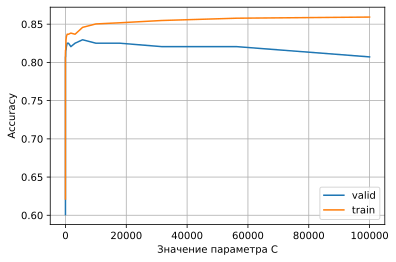

In [212]:
plt.plot(c_vals, accuracy_on_valid, label="valid")
plt.plot(c_vals, accuracy_on_train, label="train")

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [225]:
c_vals = np.linspace(700,900,50)

In [226]:
accuracy_on_valid = []
accuracy_on_train = []

for val in c_vals:
    clf = SVC(C=val, gamma="auto")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)
    
    print('C={} \tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

C=700.0 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=704.0816326530612 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=708.1632653061224 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=712.2448979591836 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=716.3265306122449 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=720.4081632653061 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=724.4897959183673 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=728.5714285714286 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=732.6530612244898 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=736.7346938775511 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=740.8163265306123 	acc_valid = 0.8251121076233184 
	acc_train = 0.8383233532934131

C=744.8979591836735 	acc_valid = 0.8251121076233184 
	acc_train = 

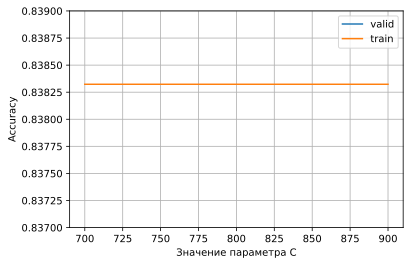

In [228]:
plt.plot(c_vals, accuracy_on_valid, label="valid")
plt.plot(c_vals, accuracy_on_train, label="train")

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')
plt.ylim([0.837, 0.839])
plt.legend()
plt.grid()

plt.show()

---
## KNN

<ol>
    <li>Алгоритм KNN</li>
    <li>Масштабирование признаков с использованием RobustScaler</li>
    <li>Классификация с помощью KNN</li>
    <li>Точность и полнота</li>
    <li>F1 Score</li>
    <li>Метрика AUC</li>    
</ol>
    
Время: 32:00

In [234]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [235]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

**Масштабирование признаков с использованием RobustScaler**

Масштабирует минимизируя влияние выбросов в данных. Достигается за счет того что для масштабирования применяется медиана данных и интерквальтийный размах (расстояние между 1ым и 3им квартилем, то есть между 25% и 75%)

In [238]:
from sklearn.preprocessing import RobustScaler

In [239]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [240]:
scale = RobustScaler()

In [241]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [242]:
X_train.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.365120,0.069237,0.062126,0.062810,0.342814,0.657186,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.163483,0.148160,0.132598,0.100724,0.475006,0.475006,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028107,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.059532,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

In [244]:
X_valid.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.376310,0.053812,0.068012,0.063003,0.381166,0.618834,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.163162,0.100208,0.139652,0.085059,0.486766,0.486766,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.005152,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283740,0.000000,0.000000,0.015412,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.029758,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.447097,0.125000,0.166667,0.061155,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,0.886906,0.500000,0.833333,0.512122,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


**Классификация с помощью KNN**

У метода есть один обязательный параметр, без которого не обойтись - количество ближайших соседей

In [249]:
k_vals = np.arange(2,10)
k_vals

array([2, 3, 4, 5, 6, 7, 8, 9])

In [251]:
accuracy_on_valid = []
accuracy_on_train = []

for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)
    print('n_neightborrs={} \tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

n_neightborrs=2 	acc_valid = 0.820627802690583 
	acc_train = 0.8862275449101796

n_neightborrs=3 	acc_valid = 0.7937219730941704 
	acc_train = 0.8667664670658682

n_neightborrs=4 	acc_valid = 0.7937219730941704 
	acc_train = 0.8473053892215568

n_neightborrs=5 	acc_valid = 0.8071748878923767 
	acc_train = 0.8577844311377245

n_neightborrs=6 	acc_valid = 0.8116591928251121 
	acc_train = 0.8398203592814372

n_neightborrs=7 	acc_valid = 0.7668161434977578 
	acc_train = 0.842814371257485

n_neightborrs=8 	acc_valid = 0.7802690582959642 
	acc_train = 0.8233532934131736

n_neightborrs=9 	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778



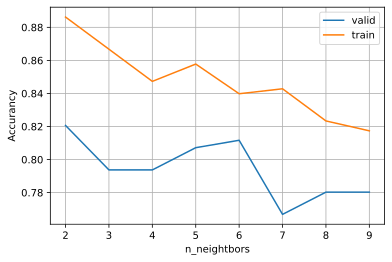

In [254]:
plt.plot(k_vals, accuracy_on_valid)
plt.plot(k_vals, accuracy_on_train)
plt.xlabel('n_neightbors')
plt.ylabel('Accurancy')
plt.grid()
plt.legend(['valid', 'train'])
pass

Лучше всего при 6.

In [255]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [256]:
accuracy_score(y_valid, y_pred)

0.8116591928251121

**ТОЧНОСТЬ И ПОЛНОТА**

In [257]:
y_valid.value_counts()

0    134
1     89
Name: Survived, dtype: int64

In [258]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

 Матрица ошибок. TN, FP, FN, TP. 
 
\begin{array}{c|c}
  TN & FP \\ 
  \hline
  FN & TP
 \end{array}

In [259]:
from sklearn.metrics import confusion_matrix

In [260]:
c_m = confusion_matrix(y_valid, y_pred)
c_m

array([[122,  12],
       [ 30,  59]], dtype=int64)

In [263]:
y_valid.shape[0]

223

Нормализуем матрицу ошибок:

In [264]:
c_m/y_valid.shape[0]

array([[0.5470852 , 0.05381166],
       [0.13452915, 0.26457399]])

*Точность:* $$precision = \dfrac{TP}{TP + FP}.$$

In [265]:
from sklearn.metrics import precision_score

In [266]:
precision_score(y_valid, y_pred)

0.8309859154929577

*Полнота:* $$recall = \dfrac{TP}{TP + FN}.$$

In [267]:
from sklearn.metrics import recall_score

In [268]:
recall_score(y_valid, y_pred)

0.6629213483146067

**F1 SCORE**

Хорошим способом комбинировать эти две метрики является мера $F_1$:

$$F_1 = 2 \cdot \dfrac{precision \cdot recall}{precision + recall}.$$

Чем ближе 1, тем лучше модель!

In [269]:
from sklearn.metrics import f1_score

In [271]:
f1_score(y_valid, y_pred)

0.7374999999999999

**Метрика AUC**

Следующей часто используемой метрикой является метрика _AUC_ или _Area Under Curve_ (площадь под кривой). Часто в качестве кривой используется кривая _ROC_. Разберёмся, что это за кривая. Для этого нам нужно получить не просто метки класса для каждого классифицируемого объекта, а вероятности принадлежности к классу 1. Это можно сделать с помощью метода `.predict_proba`:

In [272]:
y_pred_proba = clf.predict_proba(X_valid)
y_pred_proba[:5]

array([[0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [274]:
y_pred_proba = y_pred_proba[:, 1]

In [275]:
y_pred_proba[:5]

array([0.16666667, 0.16666667, 0.        , 1.        , 0.33333333])

Случаи, где пассажир выжил:

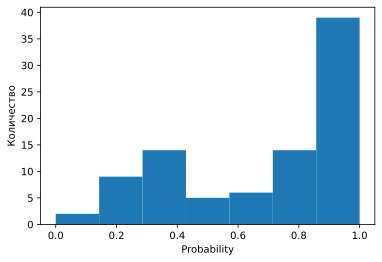

In [283]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')
pass

Случаи, где пассажир не выжил:

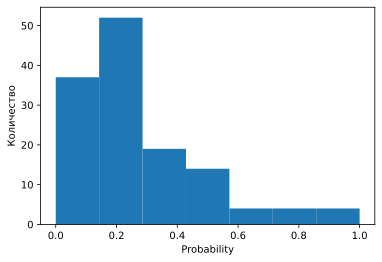

In [284]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7)
plt.xlabel('Probability')
plt.ylabel('Количество')
pass

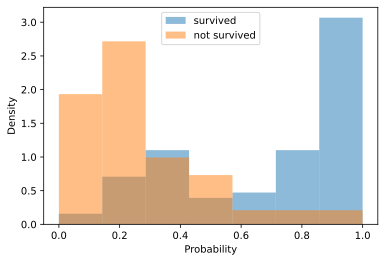

In [282]:
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, label='class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend(['survived', 'not survived'])

pass

Видно, что модель неплохо разделила утонувших и выживших.

Мы видим, что наша модель неплохо разделила объекты классов 0 и 1.

Теперь построим ROC-кривую. Для этого нам понадобятся следующие значения:

* $FPR = \dfrac{FP}{FP + TN}$ - False Positive Rate, т.е. доля False Positive

* $TPR = \dfrac{TP}{TP + FN}$ - True Positive Rate, т.е. доля True Positive (совпадает с recall)

На основании этих метрик строится ROC-кривая. Посчитаем эти значения с помощью функции `roc_curve` из модуля `sklearn.metrics`:

In [285]:
from sklearn.metrics import roc_curve

pos_label = 1, означает что истинное значение (выжил) находится по параметру 1

In [287]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

In [288]:
fpr

array([0.        , 0.02985075, 0.05970149, 0.08955224, 0.19402985,
       0.3358209 , 0.7238806 , 1.        ])

In [289]:
tpr

array([0.        , 0.43820225, 0.59550562, 0.66292135, 0.71910112,
       0.87640449, 0.97752809, 1.        ])

Пороги, после которых класс относят к позитивному

In [291]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

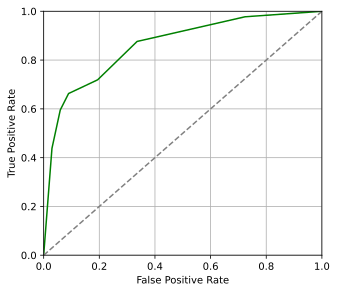

In [293]:
plt.rcParams['figure.figsize'] = 5, 4.5

plt.plot(fpr, tpr, color = 'green', label = 'ROC Curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()

plt.show()

Площадь под прямой:

In [296]:
from sklearn.metrics import roc_auc_score

In [297]:
roc_auc_score(y_valid, y_pred_proba)

0.8587959080999497

---
## Деревья решений и случайный лес

<ol>
    <li>Интерпретируемость моделей машинного обучения</li>
    <li>Применение деревьев решений</li>
    <li>Случайный лес</li>
    <li>Кросс-валидация</li>
    <li>Поиск по сетке параметров</li>
</ol>
    
Время: 41:41

In [298]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Дерево решений очень легко интерпретируется. Может решать задачу классификации или регрессии.

**Решение задачи классификации**

Дерево решений.

-Нормализовывать данные нет необходимости<br>
-Важно правильно подобрать параметры.<br> _Глубина дерева_ Чем больше глубина тем больше переобучение.



In [299]:
from sklearn.tree import DecisionTreeClassifier

In [300]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [301]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [302]:
accuracy_valid = []
accuracy_train = []

for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('max_depth={} \tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

max_depth=2 	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383

max_depth=3 	acc_valid = 0.8026905829596412 
	acc_train = 0.8323353293413174

max_depth=4 	acc_valid = 0.8071748878923767 
	acc_train = 0.842814371257485

max_depth=5 	acc_valid = 0.7982062780269058 
	acc_train = 0.8502994011976048

max_depth=6 	acc_valid = 0.7713004484304933 
	acc_train = 0.8577844311377245

max_depth=7 	acc_valid = 0.8116591928251121 
	acc_train = 0.875748502994012

max_depth=8 	acc_valid = 0.7668161434977578 
	acc_train = 0.8967065868263473

max_depth=9 	acc_valid = 0.7668161434977578 
	acc_train = 0.9131736526946108

max_depth=10 	acc_valid = 0.7354260089686099 
	acc_train = 0.9341317365269461

max_depth=11 	acc_valid = 0.7533632286995515 
	acc_train = 0.9491017964071856

max_depth=12 	acc_valid = 0.7309417040358744 
	acc_train = 0.9565868263473054

max_depth=13 	acc_valid = 0.7399103139013453 
	acc_train = 0.9700598802395209

max_depth=14 	acc_valid = 0.7219730941704036 
	acc_train = 0.9

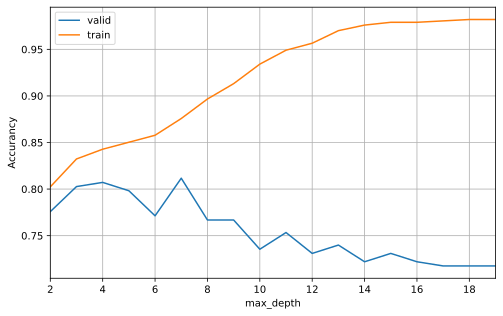

In [306]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('Accurancy')
plt.grid()
plt.legend(['valid', 'train'])
plt.xlim([2,19])
pass

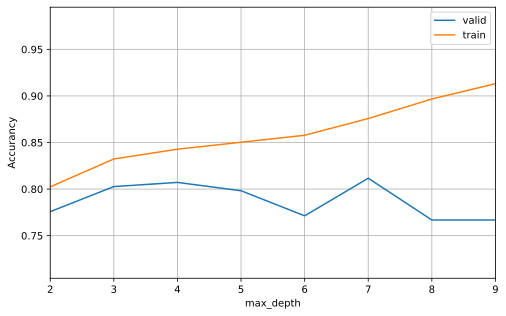

In [307]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('Accurancy')
plt.grid()
plt.legend(['valid', 'train'])
plt.xlim([2,9])
pass

In [308]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [309]:
accuracy_score(y_valid, y_pred)

0.8116591928251121

Точность при построении дерева хуже чем были до этого. Юзать надо не дерево, а целый лес таких деревьев (Ансамбль деревьев) ака RandomForest.

**RandomForest**

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
from sklearn.model_selection import GridSearchCV

In [319]:
parameters = [{'n_estimators':[150, 200, 250],
               'max_features': np.arange(5,9),
               'max_depth': np.arange(5,10)}]

In [320]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                  param_grid=parameters,
                  scoring='accuracy',
                  cv=5)

**Кросс-валидация**

cv = 5

Это означает, что выборка будет поделена на 5 фолдов, 1 фолд - валидационный, 4 фолда - тренировачные. Данные будут перемешиваться также 5 раз, то есть 5 случаев, когда каждый отдельный фолд будет валидационным. Это помогает избегать переобучения.

In [321]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([5, 6, 7, 8, 9]),
                          'max_features': array([5, 6, 7, 8]),
                          'n_estimators': [150, 200, 250]}],
             scoring='accuracy')

In [322]:
clf.best_params_

{'max_depth': 5, 'max_features': 7, 'n_estimators': 200}

In [323]:
clf.cv_results_

{'mean_fit_time': array([0.13888102, 0.18440623, 0.23375173, 0.14313493, 0.18981066,
        0.2374794 , 0.14471931, 0.19524579, 0.23996406, 0.14502897,
        0.19326696, 0.24647198, 0.1457159 , 0.18939328, 0.23839707,
        0.14400163, 0.19367285, 0.24040008, 0.14790649, 0.19676929,
        0.25123525, 0.15003543, 0.19851017, 0.24663205, 0.14091806,
        0.18885107, 0.23283944, 0.14701014, 0.19437995, 0.24233756,
        0.15060096, 0.19879518, 0.24793601, 0.15469451, 0.20430112,
        0.25083461, 0.14318738, 0.19287271, 0.24121528, 0.14679837,
        0.20090914, 0.25212679, 0.15763936, 0.21156969, 0.25849924,
        0.16109438, 0.21822491, 0.26891952, 0.15037313, 0.20012884,
        0.24718966, 0.15559983, 0.20369205, 0.25625038, 0.156111  ,
        0.21209021, 0.26493368, 0.16245236, 0.21905117, 0.27331553]),
 'std_fit_time': array([0.00370771, 0.00277702, 0.00120951, 0.00224619, 0.00247249,
        0.00204898, 0.00142872, 0.00162255, 0.00403074, 0.0009495 ,
        0.001

In [324]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [325]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

Применяем лучшие параметры:

In [326]:
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

Или можно просто вот так:

In [327]:
clf = RandomForestClassifier(max_depth=5, max_features=7, n_estimators = 200, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [328]:
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476